In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.io import loadmat, savemat
from scipy import signal

### loading data

In [63]:
mt_file_clean = loadmat('data/ALIGNED_CLEANED_gestures_4d_full.mat')

In [64]:
mt_file_clean.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data', 'starts', 'stops'])

In [65]:
labels = mt_file_clean['labels'][0]
labels

array([ 0,  1,  2, ...,  6, 27, 42], dtype=int64)

In [66]:
data_4d = mt_file_clean['data']
data_4d.shape

(7153, 120, 67, 3)

In [67]:
data_4d = data_4d[::,::,8:22,::]
data_4d.shape

(7153, 120, 14, 3)

In [68]:
starts, stops = mt_file_clean['starts'][0], mt_file_clean['stops'][0]
(starts, stops)

(array([20, 20, 20, ..., 20, 20, 20], dtype=int64),
 array([72, 61, 69, ..., 61, 67, 70], dtype=int64))

In [69]:
starts.shape

(7153,)

### Dataset preparation

In [70]:
data_3d = data_4d.reshape(data_4d.shape[0], data_4d.shape[1], data_4d.shape[2]*data_4d.shape[3])
data_3d.shape

(7153, 120, 42)

### Classifiers

In [71]:
from sklearn.preprocessing import StandardScaler

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier(n_neighbors=5)
RF = RandomForestClassifier(max_depth=10, n_estimators=50)

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
from tqdm import tqdm

In [89]:
# from sklearn.utils import shuffle
# labels = shuffle(labels, random_state=0)

In [90]:
lda_scores_mean = []
lda_scores_std = []
steps = np.arange(0,101,5)
window_size = 10
for strt in tqdm(steps):
    data_2d = data_3d[::,strt:strt+window_size,::].reshape(data_3d.shape[0],window_size*data_3d.shape[2])
    
    scaler = StandardScaler()
    data_2d = scaler.fit_transform(data_2d.T).T
    
    cv_scores = cross_val_score(estimator=RF, X=data_2d, y=labels)
    lda_scores_mean.append(np.mean(cv_scores))
    lda_scores_std.append(np.std(cv_scores))    

 10%|███████▉                                                                           | 2/21 [01:36<15:21, 48.48s/it]


KeyboardInterrupt: 

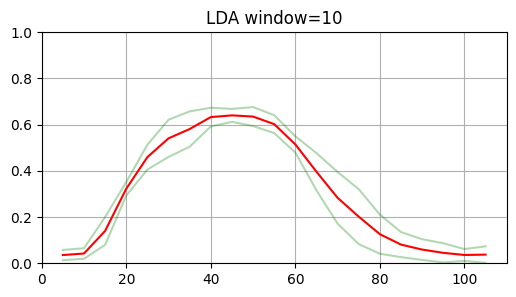

In [83]:
plt.figure(figsize=(6,3))
plt.title(f'LDA window={window_size}')
plt.plot(steps + window_size//2, np.array(lda_scores_mean) + 3*np.array(lda_scores_std), 'g', alpha=0.3)
plt.plot(steps + window_size//2, lda_scores_mean, 'r')
plt.plot(steps + window_size//2, np.array(lda_scores_mean) - 3*np.array(lda_scores_std), 'g', alpha=0.3)

plt.grid(True)
plt.ylim(0,1)
plt.xlim(0,110)
plt.show()